## EDA and Visualization

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u = pd.read_csv('raw/users.csv')
p = pd.read_csv('raw/posts.csv')
v = pd.read_csv('raw/views.csv')

In [3]:
u.head()

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [4]:
p.head()

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [5]:
v.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [6]:
u.columns = ['user_id', 'name', 'gender', 'academics']

In [7]:
p.columns = ['post_id', 'title', 'category', 'post_type']

In [8]:
df = v.merge(u, on='user_id', how='left').merge(p, on='post_id', how='left')

In [9]:
df.shape

(1449, 9)

In [10]:
df.head()

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Parth Vijay,male,undergraduate,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,Asif Hossain,male,undergraduate,She got a new hairstyle! Photo by Chirag,Photography,artwork
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,Asif Hossain,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Asif Hossain,male,undergraduate,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog


In [11]:
df[df.isnull().any(axis=1)]

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
14,5ecb979eeaff6b0c3a58a4f0,5ed3ef4cbd514d602c1530f2,2020-05-31T19:06:06.841Z,Kanika Sharma,female,undergraduate,Recommendation Engine,NaN,project
20,5ecb979eeaff6b0c3a58a4f0,5ed0f0c576027d35905cc3c7,2020-05-31T14:19:56.187Z,Kanika Sharma,female,undergraduate,Designing Circular Microstrip Antenna,NaN,project
21,5ecb979eeaff6b0c3a58a4f0,5ed0e65976027d35905cc356,2020-05-31T14:19:47.732Z,Kanika Sharma,female,undergraduate,Moore FSM Sequence Detector,NaN,project
82,5ed232b976027d35905cc689,5ed175f176027d35905cc554,2020-05-30T10:26:48.029Z,Mohd Junaid Mansuri,male,graduate,GAN's Introduction,NaN,project
83,5ecb979eeaff6b0c3a58a4f0,5de179d80eb5e25a8a07f079,2020-05-30T10:26:47.432Z,Kanika Sharma,female,undergraduate,Navigation system using BFS DFS algorithms,NaN,project
...,...,...,...,...,...,...,...,...,...
1257,5df20f1fee4bb5252b4f5351,5e4da502f5561b1994c8e42c,2020-04-02T06:39:29.552Z,Aryan Malakar,male,undergraduate,Prime No.(PHP),NaN,project
1277,5df20f1fee4bb5252b4f5351,5e4dab15f5561b1994c8e446,2020-04-02T06:37:02.191Z,Aryan Malakar,male,undergraduate,Palindrome No.(PHP),NaN,project
1278,5df20f1fee4bb5252b4f5351,5e4ed85af5561b1994c8e470,2020-04-02T06:36:54.024Z,Aryan Malakar,male,undergraduate,Factorial (.net),NaN,project
1282,5df20f1fee4bb5252b4f5351,5e4c3873f5561b1994c8e3d9,2020-04-02T06:36:27.773Z,Aryan Malakar,male,undergraduate,Bill Calculation(PHP),NaN,project


In [12]:
cls = []
for i in df.category.unique():
    cls.extend(str(i).split('|'))
cls = list(set(cls))

In [13]:
len(cls)

235

In [14]:
cls.remove('nan')

In [15]:
len(cls)

234

In [16]:
cls

['Mobile Applications',
 'Science;Technology',
 'Industrial Instrumentation',
 'Craft work',
 'Quantum Mecahnics',
 'Mosaic painting',
 'Psycholgy',
 'Education',
 'Sociology of Religion',
 'Graphic',
 'Garment Technology',
 'Business Enviorment',
 'Fashion Portfoilio',
 'Marketing Management',
 'Principles Of Marketing',
 'Management',
 'Entreperneurship',
 'Alternate Dispute Resolution',
 'Acrylics',
 'Fine Arts',
 'Accounting',
 'Drawings',
 'Computation',
 'Advertising',
 'Secratarial Audit',
 'Calligraphy',
 'Pattern & Culture',
 'Artificial Intelligence',
 'Audit Remark',
 'Banking',
 'International Marketing',
 'Database Management',
 'Radiology',
 'Bio-entrepreneurship',
 'Income Tax Laws',
 'New Venture Planning',
 'Statuary Audit',
 'Business',
 'Archeology',
 'Economic Policies',
 'Banking Law',
 'Fashion Trends',
 'Fashion Textile',
 'Photography',
 'Environmental Biotechnology',
 'Pen and ink',
 'Fundamental Rights',
 'Accounting Theory And Practices',
 'Tapestry',
 'Perfo

In [17]:
len(cls)

234

In [18]:
df1 = df.copy()

In [19]:
for i in cls:
    df1[i] = 0

In [20]:
df.columns.shape

(9,)

In [21]:
df1.columns.shape

(243,)

In [22]:
for i, j in enumerate(df1['category']):
    for x in str(j).split('|'):
        if x=='nan':
            continue
        df1[x][i]=1
        print(i, df1[x][i])
        

<ipython-input-22-7702a180e1dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[x][i]=1


0 1
0 1
0 1
0 1
0 1
1 1
1 1
1 1
2 1
3 1
3 1
4 1
4 1
4 1
5 1
5 1
5 1
6 1
7 1
7 1
7 1
7 1
8 1
8 1
9 1
10 1
11 1
11 1
11 1
12 1
12 1
13 1
15 1
15 1
16 1
16 1
16 1
17 1
17 1
18 1
18 1
19 1
22 1
22 1
23 1
24 1
25 1
25 1
26 1
27 1
27 1
28 1
28 1
28 1
29 1
29 1
30 1
30 1
31 1
31 1
32 1
32 1
33 1
33 1
33 1
34 1
35 1
35 1
35 1
35 1
36 1
36 1
37 1
38 1
38 1
39 1
39 1
40 1
40 1
41 1
41 1
42 1
42 1
43 1
43 1
44 1
44 1
45 1
46 1
46 1
47 1
47 1
48 1
48 1
48 1
49 1
49 1
50 1
50 1
50 1
51 1
51 1
52 1
52 1
52 1
53 1
53 1
54 1
54 1
55 1
55 1
55 1
56 1
56 1
56 1
57 1
57 1
58 1
59 1
60 1
60 1
61 1
61 1
62 1
63 1
63 1
63 1
64 1
64 1
65 1
65 1
65 1
66 1
66 1
67 1
67 1
68 1
69 1
69 1
70 1
70 1
71 1
72 1
73 1
74 1
74 1
75 1
75 1
76 1
77 1
78 1
79 1
80 1
80 1
80 1
81 1
84 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
90 1
91 1
91 1
92 1
92 1
92 1
92 1
93 1
93 1
94 1
94 1
95 1
95 1
96 1
96 1
97 1
97 1
98 1
98 1
99 1
99 1
100 1
100 1
102 1
102 1
102 1
102 1
102 1
102 1
102 1
103 1
104 1
108 1
108 1
109 1
109 1
110 1
110 

994 1
995 1
995 1
996 1
997 1
998 1
999 1
1000 1
1000 1
1000 1
1000 1
1000 1
1000 1
1001 1
1001 1
1001 1
1002 1
1003 1
1004 1
1005 1
1006 1
1006 1
1006 1
1006 1
1006 1
1006 1
1007 1
1007 1
1008 1
1008 1
1009 1
1010 1
1011 1
1012 1
1012 1
1012 1
1012 1
1012 1
1013 1
1014 1
1014 1
1014 1
1015 1
1015 1
1016 1
1017 1
1018 1
1019 1
1019 1
1020 1
1020 1
1020 1
1021 1
1021 1
1022 1
1023 1
1023 1
1024 1
1024 1
1025 1
1025 1
1026 1
1027 1
1028 1
1028 1
1029 1
1029 1
1030 1
1030 1
1030 1
1031 1
1032 1
1033 1
1034 1
1034 1
1034 1
1034 1
1034 1
1035 1
1035 1
1036 1
1037 1
1038 1
1038 1
1038 1
1039 1
1039 1
1039 1
1039 1
1039 1
1040 1
1040 1
1040 1
1040 1
1040 1
1041 1
1042 1
1043 1
1044 1
1045 1
1045 1
1046 1
1046 1
1046 1
1046 1
1047 1
1047 1
1048 1
1049 1
1049 1
1050 1
1050 1
1051 1
1051 1
1051 1
1052 1
1052 1
1053 1
1053 1
1054 1
1054 1
1055 1
1055 1
1056 1
1057 1
1057 1
1057 1
1058 1
1058 1
1058 1
1059 1
1059 1
1059 1
1059 1
1060 1
1060 1
1061 1
1062 1
1063 1
1064 1
1064 1
1065 1
1066 1
1066 1

In [23]:
df1.head()

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type,Mobile Applications,...,Political Thought,Revenue Concept,Fashion Techniques,Labor Law,Eco System,Company Law,Sports Event,Environment Studies,Pollution,Physical Geography
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,0,...,0,0,0,0,0,0,0,0,0,0
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Parth Vijay,male,undergraduate,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,0,...,0,0,0,0,0,0,0,0,0,0
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,Asif Hossain,male,undergraduate,She got a new hairstyle! Photo by Chirag,Photography,artwork,0,...,0,0,0,0,0,0,0,0,0,0
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,Asif Hossain,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,0,...,0,0,0,0,0,0,0,0,0,0
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Asif Hossain,male,undergraduate,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
mydata = df1.copy()

In [25]:
category_columns = mydata.columns.drop(['user_id', 'post_id', 'timestamp', 'name', 'gender', 'academics',
       'title', 'category', 'post_type'])
# for col in category_columns:
#     mydata[col] = mydata[col].astype('category')

In [26]:
sum_labels = mydata[category_columns].sum()
df_posts_per_label = pd.DataFrame({'Labels':category_columns, 'Total': sum_labels})

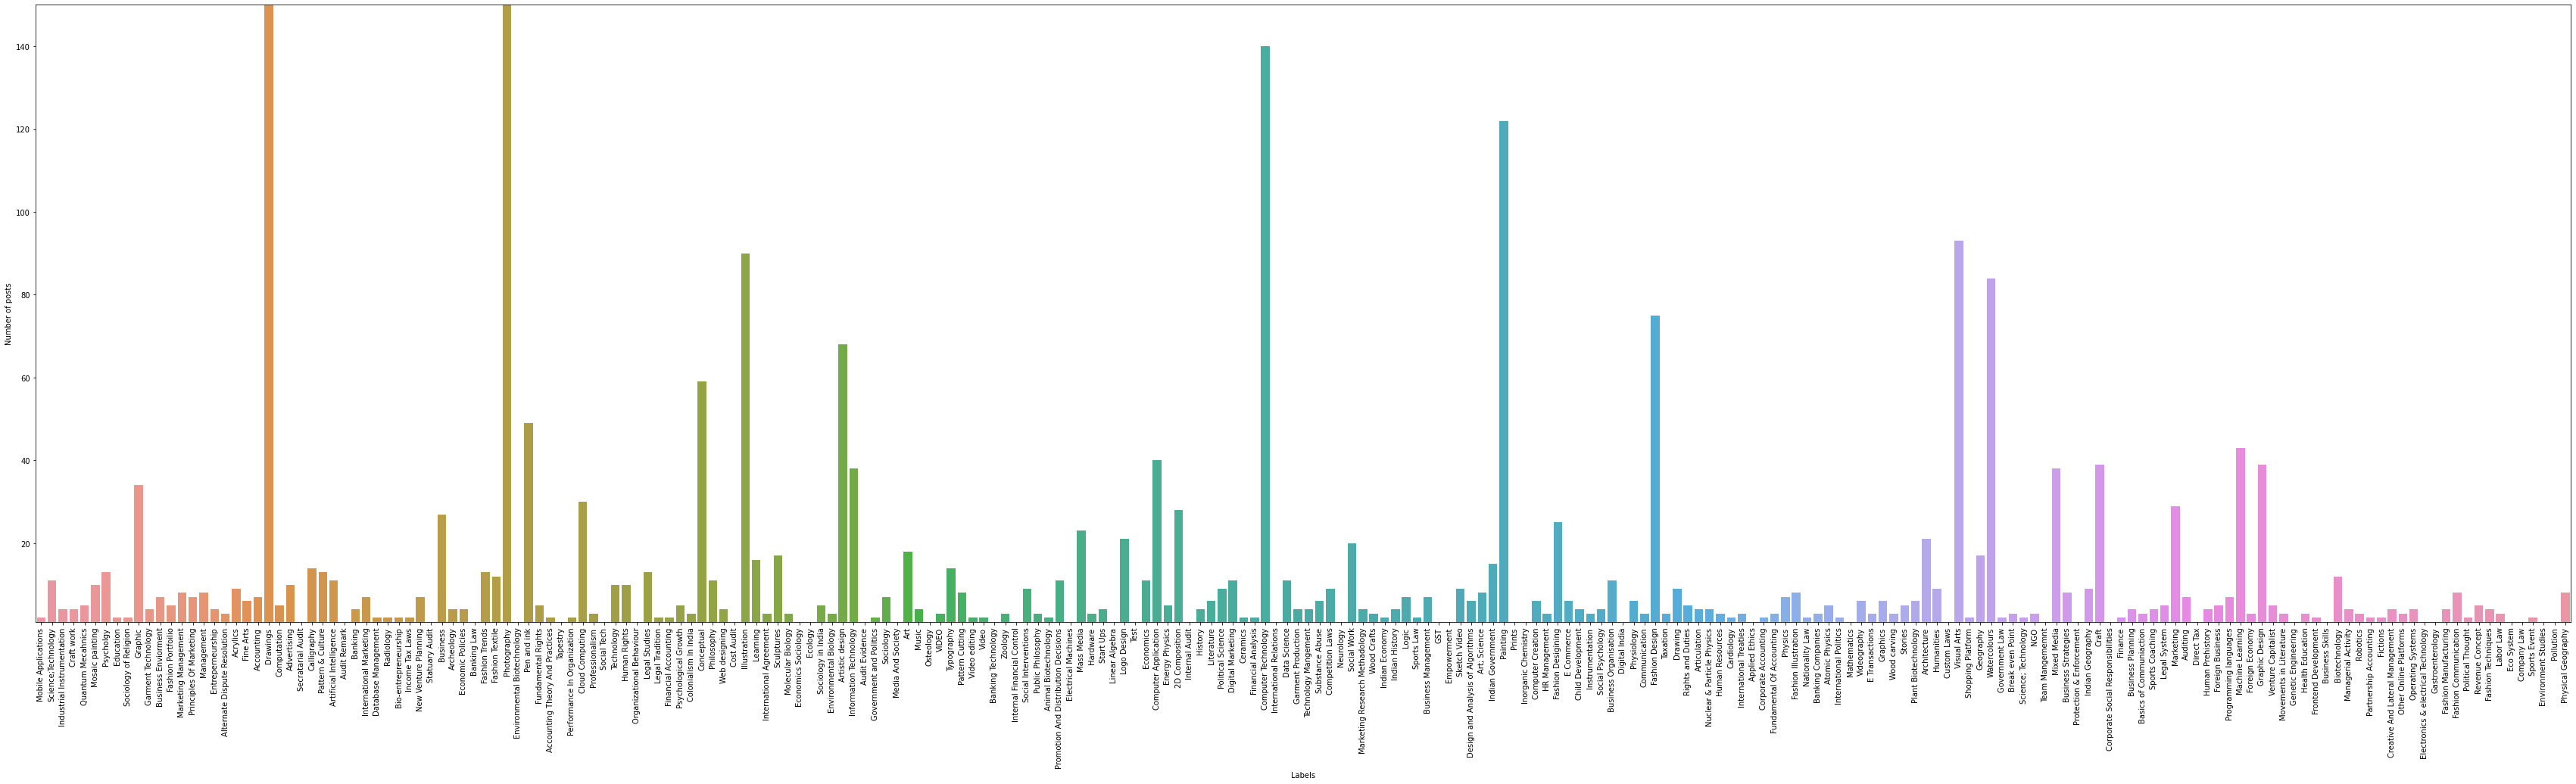

In [28]:
f, ax = plt.subplots(1, 1, figsize=(60, 15))
sns.barplot(data=df_posts_per_label, x='Labels', y='Total', axes=ax)
ax.set(ylim=(1, 150), ylabel='Number of posts')
plt.xticks(rotation=90)
plt.show()

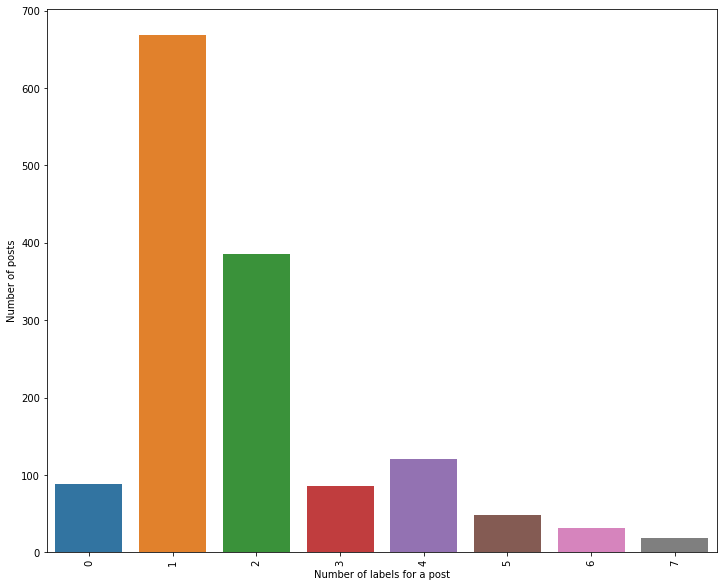

In [29]:
sum_labels = mydata[category_columns].sum(axis=1)
df_labels_per_posts = pd.DataFrame({'title': mydata.title, 'num_labels':sum_labels}).groupby('num_labels').count()
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=df_labels_per_posts, x=df_labels_per_posts.index, y='title', axes=ax)
ax.set(xlabel='Number of labels for a post', ylabel='Number of posts')
plt.xticks(rotation=90)
plt.show()